In [1]:
from keras.utils import np_utils
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Train Model

In [11]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import regularizers

In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 182 
nb_epoch = 100

# Model1 :  MLP + Layer 1(364)(ReLu)+DropOut+BN + Layer 2 (182)(ReLu)+DropOut+BN + O/p Layer(Softmax)(10)

In [13]:
model_relu = Sequential()

model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer="he_normal"))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(182, activation='relu',kernel_initializer="he_normal"))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))
               
               
model_relu.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 364)               285740    
_________________________________________________________________
batch_normalization_1 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_1 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 182)               66430     
_________________________________________________________________
batch_normalization_2 (Batch (None, 182)               728       
_________________________________________________________________
dropout_2 (Dropout)  

In [14]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.4863 - acc: 0.8521 - val_loss: 0.1658 - val_acc: 0.9490
Epoch 2/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.2260 - acc: 0.9320 - val_loss: 0.1182 - val_acc: 0.9645
Epoch 3/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.1744 - acc: 0.9470 - val_loss: 0.1046 - val_acc: 0.9670
Epoch 4/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.1479 - acc: 0.9555 - val_loss: 0.0940 - val_acc: 0.9701
Epoch 5/100
60000/60000 [==============================] - 2s 42us/step - loss: 0.1291 - acc: 0.9609 - val_loss: 0.0798 - val_acc: 0.9743
Epoch 6/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.1164 - acc: 0.9635 - val_loss: 0.0816 - val_acc: 0.9747
Epoch 7/100
60000/60000 [==============================] - 3s 42us/step - 

60000/60000 [==============================] - 3s 42us/step - loss: 0.0271 - acc: 0.9903 - val_loss: 0.0618 - val_acc: 0.9846
Epoch 58/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0255 - acc: 0.9915 - val_loss: 0.0543 - val_acc: 0.9858
Epoch 59/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0278 - acc: 0.9906 - val_loss: 0.0594 - val_acc: 0.9844
Epoch 60/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0247 - acc: 0.9917 - val_loss: 0.0586 - val_acc: 0.9850
Epoch 61/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0274 - acc: 0.9904 - val_loss: 0.0574 - val_acc: 0.9844
Epoch 62/100
60000/60000 [==============================] - 2s 42us/step - loss: 0.0237 - acc: 0.9920 - val_loss: 0.0551 - val_acc: 0.9858
Epoch 63/100
60000/60000 [==============================] - 2s 42us/step - loss: 0.0256 - acc: 0.9914 - val_loss: 0.0566 - val_acc: 0.9857
Epoch 64/100
60000/60000 [==============

Test score: 0.06141575793429402
Test accuracy: 0.985


<IPython.core.display.Javascript object>


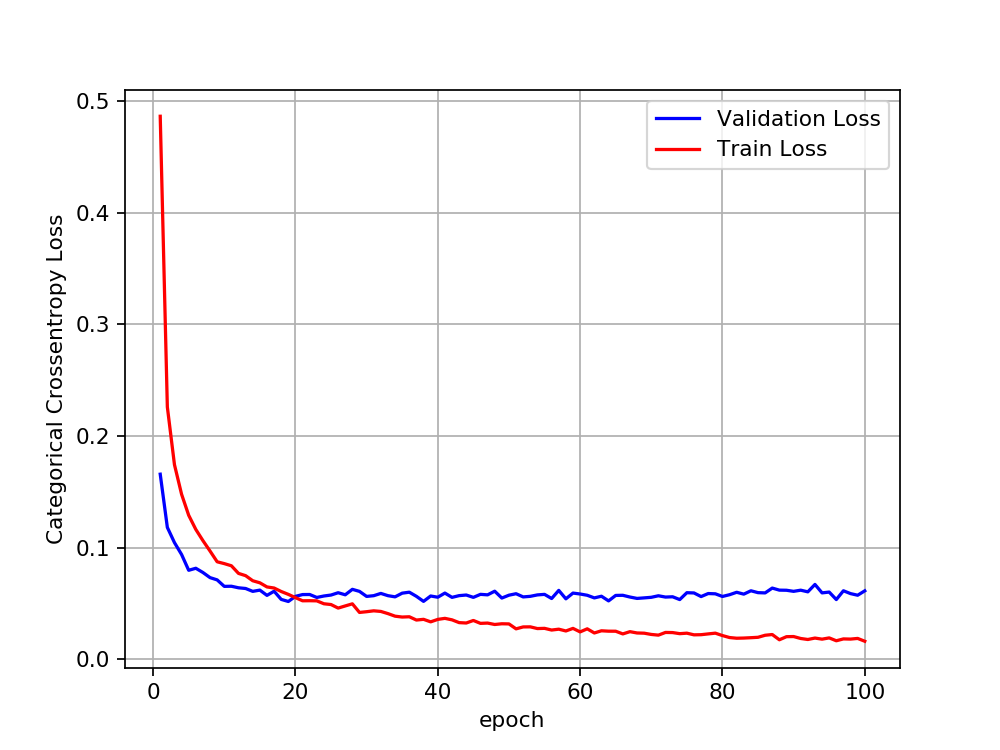

In [15]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


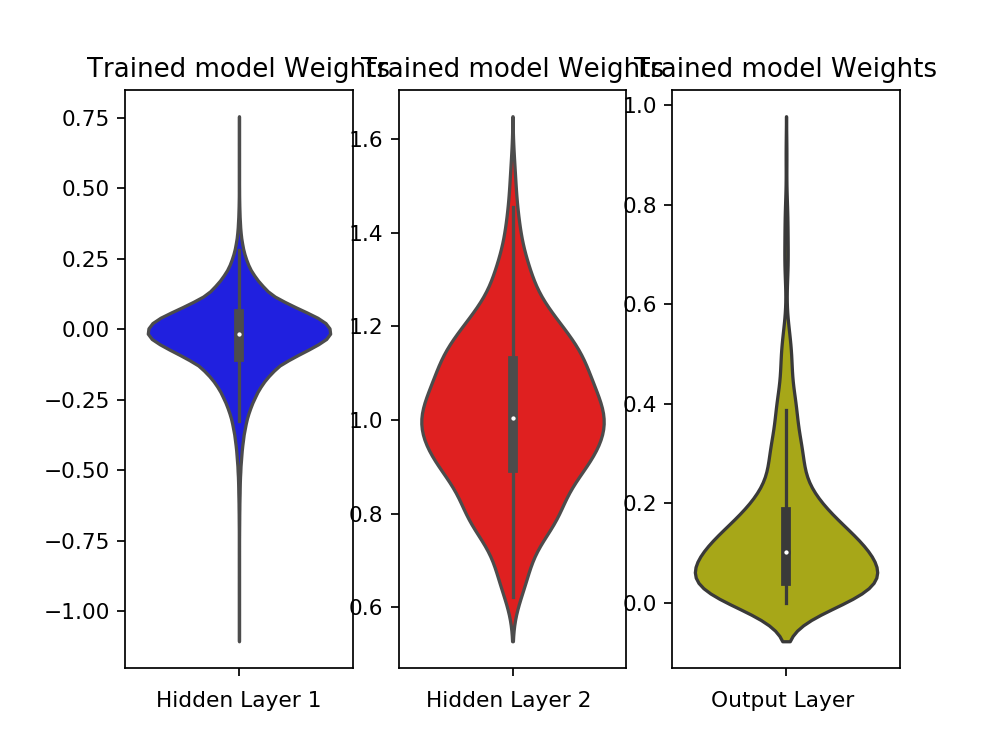

In [36]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Model 2 : MLP + Layer 1(364)(ReLu)+DropOut+BN + Layer 2 (182)(ReLu)+DropOut+BN +Layer 3(91)(ReLu)+DropOut+BN+ O/p Layer(Softmax)(10)

In [29]:
# some model parameters

output_dim2 = 10
input_dim2 = X_train.shape[1]

batch_size2 = 91
nb_epoch2 = 100

In [30]:
model_relu3 = Sequential()

model_relu3.add(Dense(364, activation='relu', input_shape=(input_dim2,),kernel_initializer="he_normal"))
model_relu3.add(BatchNormalization())
model_relu3.add(Dropout(0.5))

model_relu3.add(Dense(182, activation='relu',kernel_initializer="he_normal"))
model_relu3.add(BatchNormalization())
model_relu3.add(Dropout(0.5))


model_relu3.add(Dense(91, activation='relu',kernel_initializer="he_normal"))
model_relu3.add(BatchNormalization())
model_relu3.add(Dropout(0.5))

model_relu3.add(Dense(output_dim2, activation='softmax'))
               
               
model_relu3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_11 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_12 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 182)               66430     
_________________________________________________________________
batch_normalization_12 (Batc (None, 182)               728       
_________________________________________________________________
dropout_13 (Dropout)         (None, 182)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 91)                16653     
__________

In [31]:
model_relu3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu3.fit(X_train, Y_train, batch_size=batch_size2, epochs=nb_epoch2, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.6418 - acc: 0.8030 - val_loss: 0.1774 - val_acc: 0.9458
Epoch 2/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.2926 - acc: 0.9166 - val_loss: 0.1258 - val_acc: 0.9609
Epoch 3/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.2249 - acc: 0.9351 - val_loss: 0.1094 - val_acc: 0.9683
Epoch 4/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1921 - acc: 0.9451 - val_loss: 0.1043 - val_acc: 0.9687
Epoch 5/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.1719 - acc: 0.9503 - val_loss: 0.0940 - val_acc: 0.9719
Epoch 6/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.1568 - acc: 0.9554 - val_loss: 0.0826 - val_acc: 0.9746
Epoch 7/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.1442 - acc: 0.9584 - val_loss: 0.0791 -

60000/60000 [==============================] - 5s 87us/step - loss: 0.0452 - acc: 0.9863 - val_loss: 0.0562 - val_acc: 0.9853
Epoch 60/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0441 - acc: 0.9867 - val_loss: 0.0591 - val_acc: 0.9845
Epoch 61/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0413 - acc: 0.9877 - val_loss: 0.0550 - val_acc: 0.9852
Epoch 62/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0400 - acc: 0.9882 - val_loss: 0.0548 - val_acc: 0.9868
Epoch 63/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0423 - acc: 0.9865 - val_loss: 0.0543 - val_acc: 0.9857
Epoch 64/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.0409 - acc: 0.9873 - val_loss: 0.0565 - val_acc: 0.9857
Epoch 65/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0390 - acc: 0.9882 - val_loss: 0.0533 - val_acc: 0.9869
Epoch 66/100
60000/60000 [==============

Test score: 0.062448625635228384
Test accuracy: 0.9852


<IPython.core.display.Javascript object>


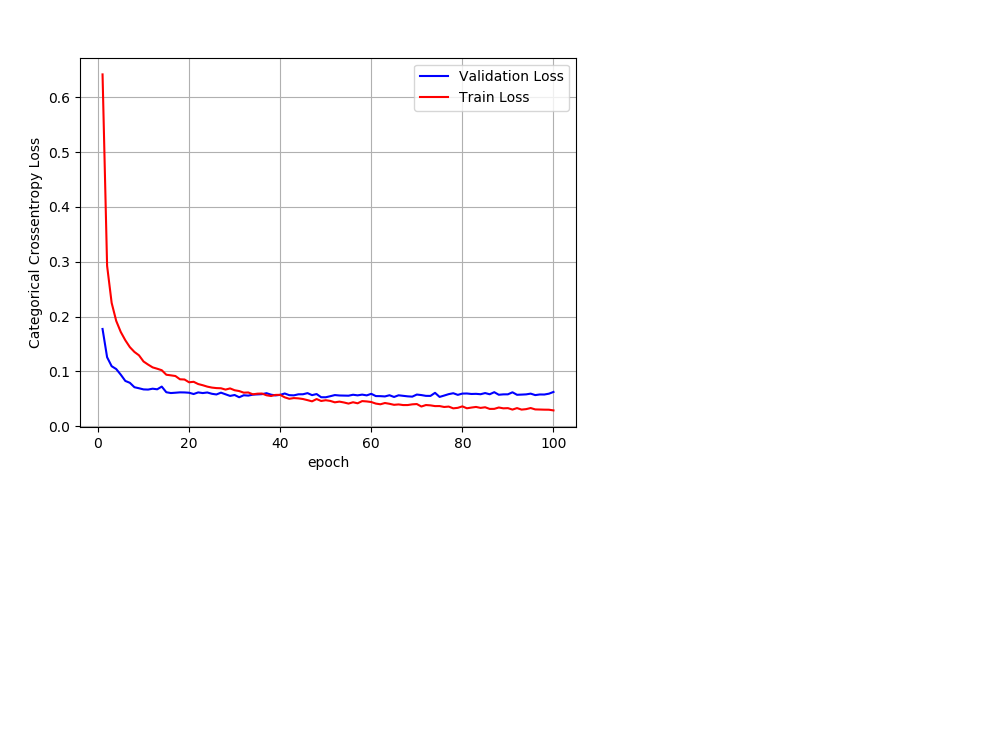

In [32]:
score = model_relu3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch2+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


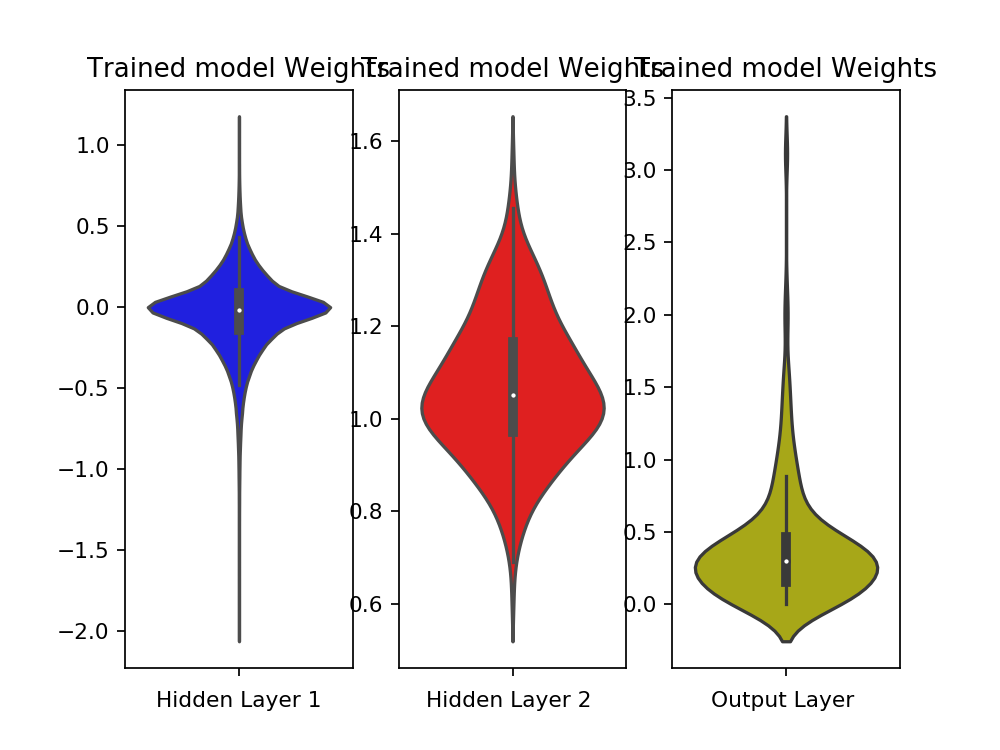

In [37]:
w_after3 = model_relu3.get_weights()

h1_w3 = w_after3[0].flatten().reshape(-1,1)
h2_w3 = w_after3[2].flatten().reshape(-1,1)
out_w3 = w_after3[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w3,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w3, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w3,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Model 3 : MLP + Layer 1(364)(ReLu)+DropOut+BN + Layer 2 (182)(ReLu)+DropOut+BN +Layer 3(91)(ReLu)+DropOut+BN+Layer 4(60)(ReLu)+DropOut+BN+Layer 5(25)(ReLu)+DropOut+BN+ O/p Layer(Softmax)(10)

In [34]:
# some model parameters

output_dim3 = 10
input_dim3 = X_train.shape[1]

batch_size3 = 100
nb_epoch3 = 100

In [48]:
model_relu5 = Sequential()

model_relu5.add(Dense(364, activation='relu', input_shape=(input_dim2,),kernel_initializer="he_normal"))
model_relu5.add(BatchNormalization())
model_relu5.add(Dropout(0.5))

model_relu5.add(Dense(182, activation='relu',kernel_initializer="he_normal"))
model_relu5.add(BatchNormalization())
model_relu5.add(Dropout(0.5))


model_relu5.add(Dense(91, activation='relu',kernel_initializer="he_normal"))
model_relu5.add(BatchNormalization())
model_relu5.add(Dropout(0.5))

model_relu5.add(Dense(60, activation='relu',kernel_initializer="he_normal"))
model_relu5.add(BatchNormalization())
model_relu5.add(Dropout(0.5))

model_relu5.add(Dense(25, activation='relu',kernel_initializer="he_normal"))
model_relu5.add(BatchNormalization())
model_relu5.add(Dropout(0.5))

model_relu5.add(Dense(output_dim2, activation='softmax'))
               
               
model_relu5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_30 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_27 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 182)               66430     
_________________________________________________________________
batch_normalization_31 (Batc (None, 182)               728       
_________________________________________________________________
dropout_28 (Dropout)         (None, 182)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 91)                16653     
__________

In [49]:
model_relu5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu5.fit(X_train, Y_train, batch_size=batch_size3, epochs=nb_epoch3, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 163us/step - loss: 1.5969 - acc: 0.4575 - val_loss: 0.5612 - val_acc: 0.8760
Epoch 2/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.7570 - acc: 0.7567 - val_loss: 0.2692 - val_acc: 0.9318
Epoch 3/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.5200 - acc: 0.8542 - val_loss: 0.1899 - val_acc: 0.9479
Epoch 4/100
60000/60000 [==============================] - 8s 129us/step - loss: 0.4195 - acc: 0.8935 - val_loss: 0.1766 - val_acc: 0.9557
Epoch 5/100
60000/60000 [==============================] - 7s 118us/step - loss: 0.3677 - acc: 0.9101 - val_loss: 0.1388 - val_acc: 0.9660
Epoch 6/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.3267 - acc: 0.9232 - val_loss: 0.1307 - val_acc: 0.9671
Epoch 7/100
60000/60000 [==============================] - 7s 118us/step - loss: 0.2962 - acc: 0.9309 - val_loss: 0

60000/60000 [==============================] - 7s 115us/step - loss: 0.1030 - acc: 0.9777 - val_loss: 0.0758 - val_acc: 0.9851
Epoch 60/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.0997 - acc: 0.9781 - val_loss: 0.0756 - val_acc: 0.9845
Epoch 61/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.1005 - acc: 0.9787 - val_loss: 0.0750 - val_acc: 0.9837
Epoch 62/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.0954 - acc: 0.9797 - val_loss: 0.0768 - val_acc: 0.9856
Epoch 63/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.0936 - acc: 0.9790 - val_loss: 0.0822 - val_acc: 0.9847
Epoch 64/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.0929 - acc: 0.9801 - val_loss: 0.0849 - val_acc: 0.9835
Epoch 65/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.0957 - acc: 0.9795 - val_loss: 0.0823 - val_acc: 0.9852
Epoch 66/100
60000/60000 [=======

Test score: 0.07507101869077523
Test accuracy: 0.9862


<IPython.core.display.Javascript object>


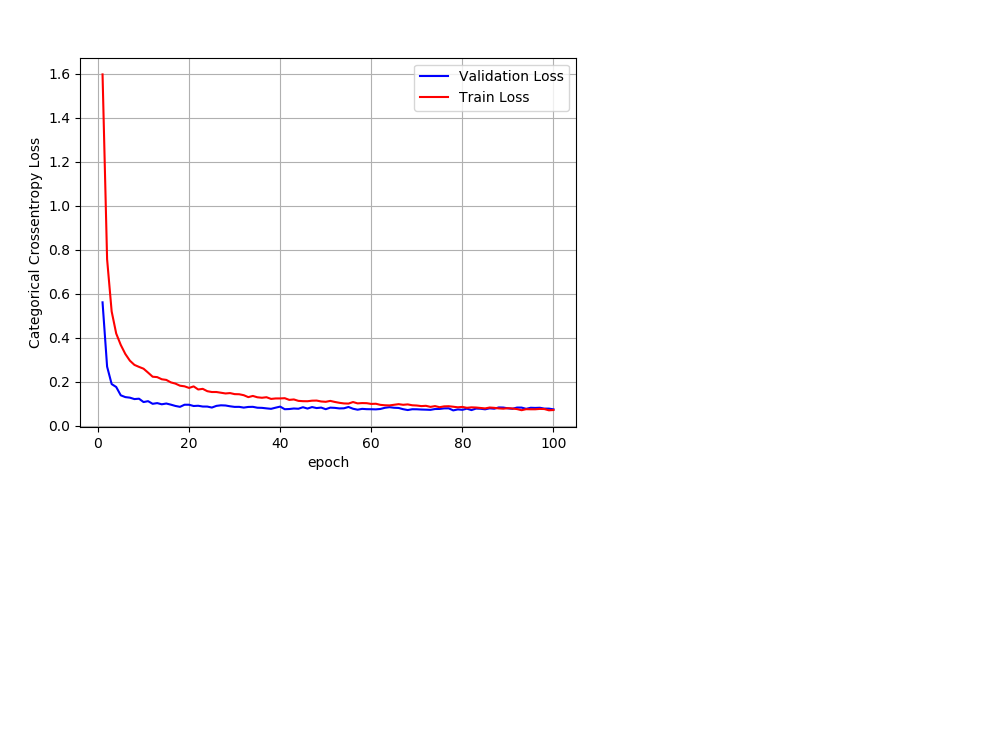

In [50]:
score = model_relu5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch2+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


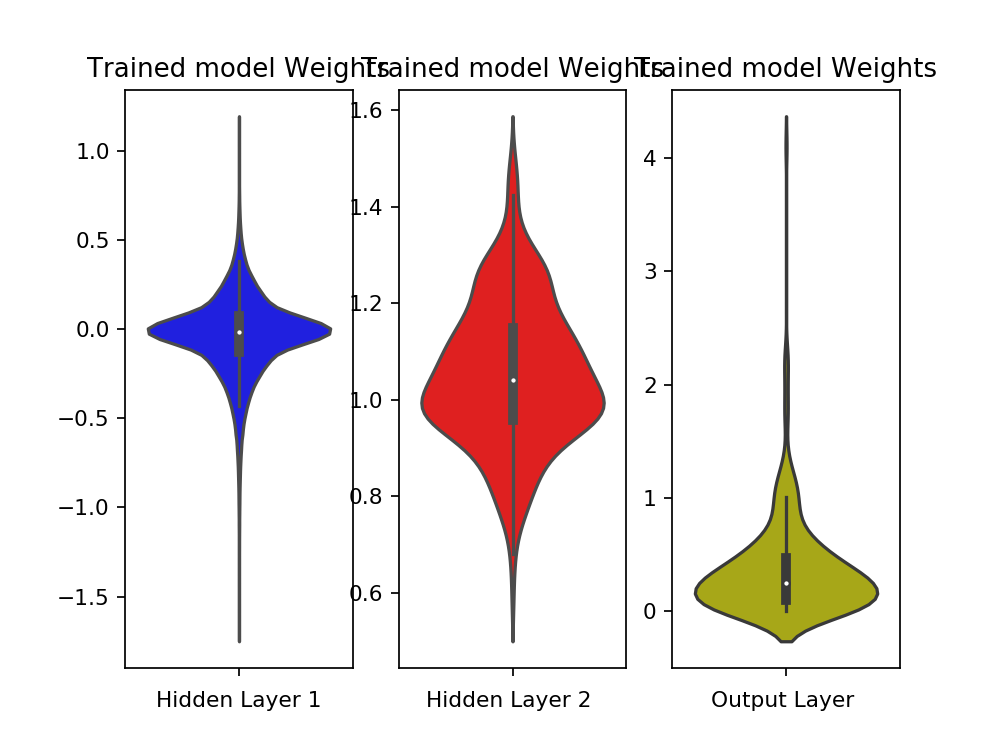

In [53]:
w_after5 = model_relu5.get_weights()

h1_w5 = w_after5[0].flatten().reshape(-1,1)
h2_w5 = w_after5[2].flatten().reshape(-1,1)
out_w5 = w_after5[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w5,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w5, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w5,color='y')
plt.xlabel('Output Layer ')
plt.show()